<a href="https://colab.research.google.com/github/amudhan023/DeepLearning/blob/main/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
from torch import nn

### Create Dataset
    We need 4 datasets 2 for training & 2 for testing
    X is the sample/dummy data
    For the given X, derive the y values using the formula y = weight * X + bias
    Split both X & y datasets into 80/20 percent

In [ ]:
def createDataset():
  weight = 0.7
  bias = 0.3
  start = 0
  end=1
  step=0.2
  X = torch.arange(0, 1, 0.02).unsqueeze(dim=1) # this is a tensor contain 50 rows
  y = weight * X + bias  # this is also a tensor contain 50 rows (multiply the weight and add bias to the X tensor)
  train_split = int(0.8*len(X)) # find the split index, For 50 rows, split index should be 40 since 80 % of 50 is 40
  X_train, y_train = X[:train_split], y[:train_split]
  X_test, y_test = X[train_split:], y[train_split:]
  return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = createDataset()

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10,7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=14, label = "Training data")
  plt.scatter(test_data, test_labels, c="g", s=14, label="Testing data")
  if predictions is not None:
    # plot the predictions if they exist
    plt.scatter(test_data,predictions, c="r", s=14, label="Predictions")

  plt.legend(prop={"size": 14})

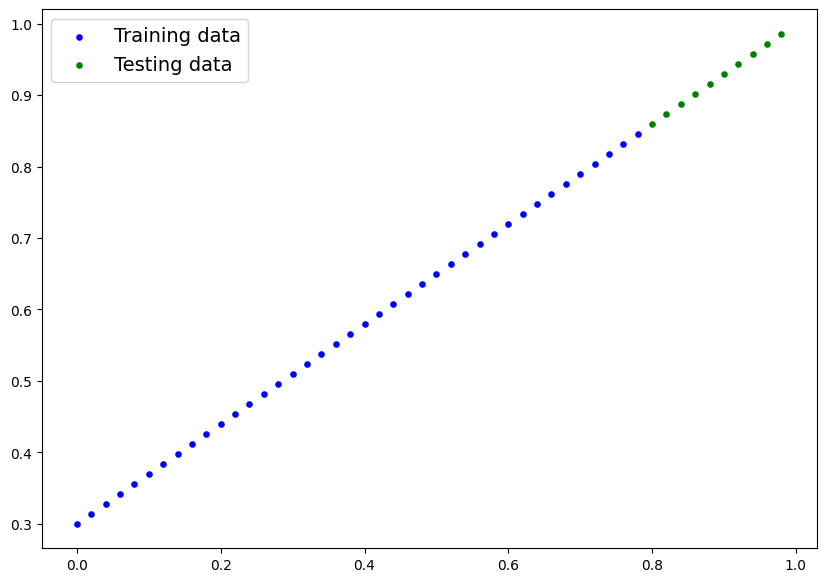

In [ ]:
plot_predictions()

### Create the model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))

  def forward(self,X):
    return self.weight * X + self.bias

#### Create training loop & testing loop
    Training
    Set the model to train mode
    forward pass the data
    calculate the loss
    set optimizer zero gradient
    call loss backward (back propagation)
    optimizer step

    Testing
    set the model to inference mode
    forward pass the data
    calculate the loss


In [ ]:
def train(model,X,y,optimizer,loss_fn):
  model.train()
  y_pred = model(X)
  loss = loss_fn(y_pred,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  return loss.item()

def test(model,X,y,optimizer,loss_fn):
  model.eval()
  with torch.inference_mode():
    y_pred = model(X)
    loss = loss_fn(y_pred,y)
    return loss.item()

In [ ]:
model = LinearRegressionModel()
def train_and_test():
    # setup a loss function
  loss_fn = nn.L1Loss()

  # setup an optimizer
  optimizer = torch.optim.SGD(params=model.parameters(),
                              lr=0.01)
  torch.manual_seed(42)
  epochs = 100
  epoch_count =[]
  train_losses =[]
  test_losses =[]

  for epoch in range(epochs):
    X_train, y_train, X_test, y_test = createDataset()
    train_loss = train(model, X_train, y_train, optimizer, loss_fn)
    test_loss = test(model, X_test, y_test, optimizer, loss_fn)

    if epoch %10 ==0 :
      epoch_count.append(epoch)
      train_losses.append(train_loss)
      test_losses.append(test_loss)

      print(f"Epoch {epoch:3d} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")
  return epoch_count, train_losses, test_losses



In [ ]:
epoch_count, train_losses, test_losses = train_and_test()

Epoch   0 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  10 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  20 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  30 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  40 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  50 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  60 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  70 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  80 | Train Loss: 0.0043 | Test Loss: 0.0044
Epoch  90 | Train Loss: 0.0043 | Test Loss: 0.0044


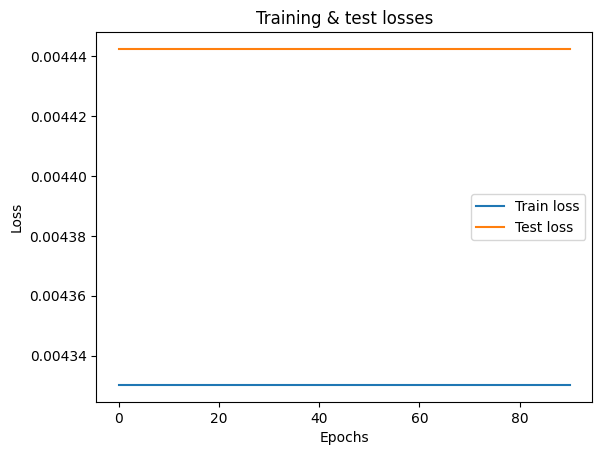

In [ ]:
plt.plot(epoch_count, train_losses, label="Train loss")
plt.plot(epoch_count, test_losses, label="Test loss")
plt.title("Training & test losses")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

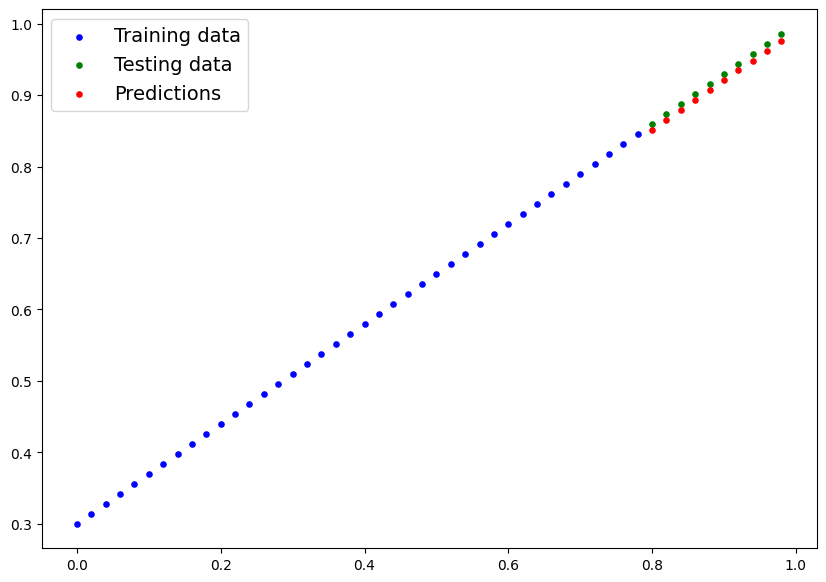

In [ ]:
with torch.inference_mode():
  y_pred=model(X_test)
  plot_predictions(predictions=y_pred)

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.6906])), ('bias', tensor([0.2993]))])

In [ ]:
# Save the model
from pathlib import Path

# 1) Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
# 2) Create model save path
MODEL_NAME = "pytorch_linear_regression_01.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3) save the model state dict

print(f"Saving model to :{MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to :models/pytorch_linear_regression_01.pth


In [ ]:
!ls -l models


total 4
-rw-r--r-- 1 root root 2125 Nov 27 01:42 pytorch_linear_regression_01.pth


In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.6906])), ('bias', tensor([0.2993]))])

In [ ]:
loaded_model= LinearRegressionModel()

In [ ]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6906])), ('bias', tensor([0.2993]))])

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model(X_test)

y_pred == loaded_model_pred


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])